In [1]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random
import csv

In [71]:
sim = rebound.Simulation()


sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .1
simtime = 1

starting_a_list = []
late_as_list = []
final_a_list = []

starting_e_list = []
final_e_list = []

rings = 200
as_per_ring = 20

for i in range (rings):

    clear_output(wait=True)
    print(i/rings)

    for j in range (as_per_ring):
        
        # sun
        sim.add(m=0.9999999999950272, x=-0.008669035216216899, y=0.0031140563797133693, z=0.00017700903203290386, vx=-0.00017842972567085554, vy=-0.0004942109647718484, vz=8.170411607613112e-06)
        # mars
        sim.add(m=3.2271560828978514e-07, x=-0.5195763051075928, y=-1.4079912951728626, z=-0.016864026009610615, vx=0.7953007114278168, vy=-0.2075756016137399, vz=-0.023844826829689417)
        # jupiter
        sim.add(m=0.0009547919099366768, x=4.717393707823112, y=-1.58629315260585, z=-0.0989587433278056, vx=0.13456873359546767, vy=0.4363713717691052, vz=-0.004821057409397645)
        
        # create astroid
        mass = 1e-29
        radius = 2.452+(0.0005*i)
        
        # res on 2.502

        # verdelen over ring met vers. ecc
        omega =(2*np.pi)*random.random()
        ecc = 0.2*random.random()
        inc = ((np.pi)/9)*random.random()

        # add astroid
        sim.add(m=mass,a=radius,omega=omega, e=ecc)
        starting_a_list.append(radius)
        starting_e_list.append(ecc)

        sim.steps(int(simtime*(1/sim.dt)))

        
        final_a_list.append(sim.particles[3].a)
        final_e_list.append(sim.particles[3].e)
        
        # Opslaan in bestandje
        with open('opslag_asteroids.csv', 'a') as f:
            
            # using csv.writer method from CSV package
            write = csv.writer(f)
            write.writerow([rings*as_per_ring, simtime, radius, sim.particles[3].a, ecc, sim.particles[3].e,  omega, sim.particles[3].omega, inc, sim.particles[3].inc])
        f.close()

        sun = sim.particles[0]
        mars = sim.particles[1]
        jupiter = sim.particles[2]
        if i == 199 and j == 19:
            with open('opslag_planets.csv', 'a') as f2:
                write = csv.writer(f2)
                write.writerow([rings*as_per_ring, simtime, sun.xyz, sun.vxyz, jupiter.xyz, jupiter.vxyz, mars.xyz, jupiter.vxyz])
            f2.close()


        sim.remove(0)
        sim.remove(0)
        sim.remove(0)
        sim.remove(0)
        #write.writerows([final_a_list])



0.995


In [59]:
print(len(final_a_list))

4000


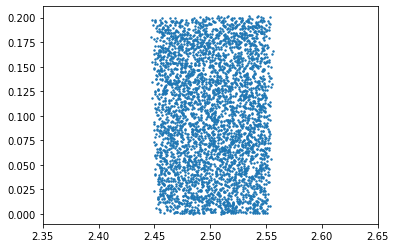

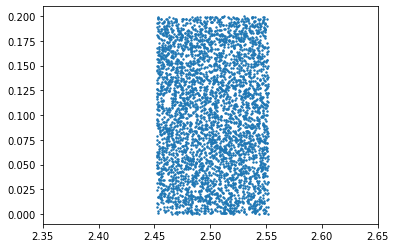

In [60]:
plt.scatter(final_a_list, final_e_list, s=2)
plt.xlim(2.35, 2.65)
#plt.ylim(-0.05, 0.3)
#plt.savefig('10001_4000_1_scattertotal')
plt.figure()
plt.scatter(starting_a_list, starting_e_list, s=2)
plt.xlim(2.35, 2.65)

plt.show()


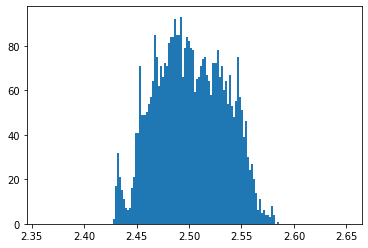

In [44]:
plt.hist(final_a_list,bins=150,range=(2.36,2.65))
#plt.savefig('1001_4000_1_hist_100b')
plt.show()

In [55]:
sim.status()

---------------------------------
REBOUND version:     	3.19.1
REBOUND built on:    	Jan 14 2022 12:48:05
Number of particles: 	3
Selected integrator: 	whfast
Simulation time:     	4.0000000000057862e+03
Current timestep:    	0.100000
---------------------------------
<rebound.particle.Particle object at 0x7f43c68cbdc0, m=0.9999999999950272 x=0.0038481741186315896 y=0.003454579524336345 z=-0.00010045785540208276 vx=-0.0002746028820238615 vy=0.00029199272816519956 vz=4.929619239120293e-06>
<rebound.particle.Particle object at 0x7f43c6666340, m=0.0009547919099366768 x=-4.030427056752151 y=-3.6186726993214378 z=0.10520450645833097 vx=0.28786945089915283 vy=-0.3058662196154168 vz=-0.0051702238214238975>
<rebound.particle.Particle object at 0x7f43c68cbdc0, m=3.2271560828978514e-07 x=0.13953079946359373 y=1.54902233826953 z=0.029263369288479214 vx=-0.7825491158091931 vy=0.14211846836430822 vz=0.02128387343236527>
---------------------------------
